In [1]:
import sqlite3
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import seaborn.objects as so
import matplotlib.pyplot as plt

from formulaic import Formula
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Obtendremos los datos directamente del repositorio

In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/FedeGiovannetti/Eco_bici_Ciudad_Universitaria/refs/heads/main/data/full_data.csv")

---
# Procesamiento de Datos

## Ejercicio 1

In [3]:
columnas_a_mantener = [
    "station_id",
    "num_bikes_available",
    "num_bikes_disabled",
    "num_docks_available",
    "num_docks_disabled",
    "Date",
    "hora",
    "dia"
]

datos_limpios = datos[columnas_a_mantener].copy()
datos_limpios.head()

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,Date,hora,dia
0,420,3,1,8,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,2025-04-29,01:13:46,Tuesday


## Ejercicio 2

In [4]:
diccionario_de_traduccion = {
    "station_id": "estacion",
    "num_bikes_available": "bicis_disponibles",
    "num_bikes_disabled": "bicis_rotas",
    "num_docks_available": "puertos_disponibles",
    "num_docks_disabled": "puertos_rotos",
    "Date": "fecha",
    "hora": "horario",
    "dia": "dia_semana"
}

datos_limpios = datos_limpios.rename(columns=diccionario_de_traduccion)
datos_limpios.head()

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana
0,420,3,1,8,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,2025-04-29,01:13:46,Tuesday


## Ejercicio 3

In [5]:
diccionario_de_dias = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

datos_limpios["dia_semana"] = datos["dia"].map(diccionario_de_dias)
datos_limpios.head()

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes
2,420,5,1,6,1,2025-04-29,00:32:59,Martes
3,464,11,2,7,0,2025-04-29,00:32:59,Martes
4,420,5,1,6,1,2025-04-29,01:13:46,Martes


## Ejercicio 4

In [6]:
datos_limpios.dtypes

estacion               int64
bicis_disponibles      int64
bicis_rotas            int64
puertos_disponibles    int64
puertos_rotos          int64
fecha                    str
horario                  str
dia_semana               str
dtype: object

**Respuesta**: El DataFrame `datos_limpios` cuenta con variables numéricas y strings de texto. Se puede ver que la fecha no es interpretada correctamente, como un tipo datetime, sino que por defecto se toma como string. En el siguiente ejercicio se va a corregir esto.

## Ejercicio 5

In [7]:
datos_limpios.info()

<class 'pandas.DataFrame'>
RangeIndex: 13206 entries, 0 to 13205
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   estacion             13206 non-null  int64
 1   bicis_disponibles    13206 non-null  int64
 2   bicis_rotas          13206 non-null  int64
 3   puertos_disponibles  13206 non-null  int64
 4   puertos_rotos        13206 non-null  int64
 5   fecha                13206 non-null  str  
 6   horario              13206 non-null  str  
 7   dia_semana           13206 non-null  str  
dtypes: int64(5), str(3)
memory usage: 825.5 KB


In [8]:
datos_limpios.isna().sum()

estacion               0
bicis_disponibles      0
bicis_rotas            0
puertos_disponibles    0
puertos_rotos          0
fecha                  0
horario                0
dia_semana             0
dtype: int64

**Respuesta**: No contiene datos faltantes, sólo la columna `traffic` completa, la cual fue eliminada en el [Ejercicio 1](#ejercicio-1), por lo que no es un problema para el análisis que se hará.

## Ejercicio 6

In [9]:
# Extracción de fecha para hacer año, mes y día, formato yyyy-mm-dd en strings
datos_limpios["anio"] = datos_limpios["fecha"].str[0:4]
datos_limpios["mes"]  = datos_limpios["fecha"].str[5:7]
datos_limpios["dia"]  = datos_limpios["fecha"].str[8:10]

# Lo mismo para horario pero solo guardo hora
datos_limpios["hora"] = datos_limpios["horario"].str[0:2]

# Conversión de string a número
columnas_de_tiempo = ["anio", "mes", "dia", "hora"]
datos_limpios[columnas_de_tiempo] = datos_limpios[columnas_de_tiempo].apply(pd.to_numeric)

datos_limpios.head()

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1


In [10]:
datos_limpios.dtypes

estacion               int64
bicis_disponibles      int64
bicis_rotas            int64
puertos_disponibles    int64
puertos_rotos          int64
fecha                    str
horario                  str
dia_semana               str
anio                   int64
mes                    int64
dia                    int64
hora                   int64
dtype: object

## Ejercicio 7

In [11]:
datos_limpios["fecha"] = pd.to_datetime(datos_limpios["fecha"])
datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"], format="%H:%M:%S").dt.time

datos_limpios.head()

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1


In [12]:
datos_limpios.dtypes

estacion                        int64
bicis_disponibles               int64
bicis_rotas                     int64
puertos_disponibles             int64
puertos_rotos                   int64
fecha                  datetime64[us]
horario                        object
dia_semana                        str
anio                            int64
mes                             int64
dia                             int64
hora                            int64
dtype: object

## Ejercicio 8

In [13]:
datos_limpios.groupby("anio")["fecha"].nunique()

anio
2025    248
2026     54
Name: fecha, dtype: int64

In [14]:
def determinar_estacion_anio(row):
    fecha = row["fecha"]
    anio = fecha.year
    
    empieza_otonio    = pd.Timestamp(year=anio, month=3,  day=21)
    empieza_invierno  = pd.Timestamp(year=anio, month=6,  day=21)
    empieza_primavera = pd.Timestamp(year=anio, month=9,  day=21)
    empieza_verano    = pd.Timestamp(year=anio, month=12, day=21)

    if empieza_otonio <= fecha < empieza_invierno:
        return "Otoño"
    elif empieza_invierno <= fecha < empieza_primavera:
        return "Invierno"
    elif empieza_primavera <= fecha < empieza_verano:
        return "Primavera"
    else:
        return "Verano"

datos_limpios["estacion_anio"] = datos_limpios.apply(determinar_estacion_anio, axis=1)
datos_limpios.head()

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1,Otoño


In [15]:
datos_limpios.groupby("mes")[["anio", "estacion_anio"]].value_counts()

mes  anio  estacion_anio
1    2026  Verano           1336
2    2026  Verano            900
4    2025  Otoño              92
5    2025  Otoño            1408
6    2025  Otoño             880
           Invierno          428
7    2025  Invierno         1322
8    2025  Invierno         1378
9    2025  Invierno          908
           Primavera         446
10   2025  Primavera        1406
11   2025  Primavera        1346
12   2025  Primavera         880
           Verano            476
Name: count, dtype: int64

---
# Análisis Descriptivo

## Ejercicio 9

In [16]:
cantidad_bicis_disponibles = datos_limpios["bicis_disponibles"].sum()
print(f"Cantidad de bicis disponibles: {cantidad_bicis_disponibles}")

cantidad_bicis_rotas = datos_limpios["bicis_rotas"].sum()
print(f"Cantidad de bicis rotas: {cantidad_bicis_rotas}")

cantidad_puertos_disponibles = datos_limpios["puertos_disponibles"].sum()
print(f"Cantidad de puertos disponibles: {cantidad_puertos_disponibles}")

Cantidad de bicis disponibles: 57955
Cantidad de bicis rotas: 16991
Cantidad de puertos disponibles: 136107


In [17]:
datos_eda = datos_limpios[[
    "bicis_disponibles",
    "bicis_rotas",
    "puertos_disponibles",
    "fecha",
    "hora",
    "dia_semana",
    "dia",
    "mes",
    "anio",
    "estacion_anio"
]]

datos_eda.head()

,bicis_disponibles,bicis_rotas,puertos_disponibles,fecha,hora,dia_semana,dia,mes,anio,estacion_anio
0,3,1,8,2025-04-28,23,Lunes,28,4,2025,Otoño
1,11,2,7,2025-04-28,23,Lunes,28,4,2025,Otoño
2,5,1,6,2025-04-29,0,Martes,29,4,2025,Otoño
3,11,2,7,2025-04-29,0,Martes,29,4,2025,Otoño
4,5,1,6,2025-04-29,1,Martes,29,4,2025,Otoño


In [18]:
datos_eda_agrupados = datos_eda.groupby(["fecha", "hora"]).agg({
    "bicis_disponibles": "sum",
    "bicis_rotas": "sum",
    "puertos_disponibles": "sum",
    "dia_semana": "first",
    "dia": "first",
    "mes": "first",
    "anio": "first",
    "estacion_anio": "first"
}).reset_index()

datos_eda_agrupados = datos_eda_agrupados.rename(columns={
    "bicis_disponibles": "cantidad_bicis_disponibles",
    "bicis_rotas": "cantidad_bicis_rotas",
    "puertos_disponibles": "cantidad_puertos_disponibles"
})

datos_eda_agrupados.head()

,fecha,hora,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles,dia_semana,dia,mes,anio,estacion_anio
0,2025-04-28,23,14,3,15,Lunes,28,4,2025,Otoño
1,2025-04-29,0,16,3,13,Martes,29,4,2025,Otoño
2,2025-04-29,1,16,3,13,Martes,29,4,2025,Otoño
3,2025-04-29,2,16,3,13,Martes,29,4,2025,Otoño
4,2025-04-29,3,16,3,13,Martes,29,4,2025,Otoño


## Ejercicio 10

In [19]:
datos_eda_agrupados["cantidad_total_de_espacio"] = (
    datos_eda_agrupados["cantidad_bicis_disponibles"] + 
    datos_eda_agrupados["cantidad_puertos_disponibles"] + 
    datos_eda_agrupados["cantidad_bicis_rotas"]
)

datos_eda_agrupados.groupby("estacion_anio")["cantidad_total_de_espacio"].median()

estacion_anio
Invierno     32.0
Otoño        32.0
Primavera    32.0
Verano       32.0
Name: cantidad_total_de_espacio, dtype: float64

In [20]:
datos_eda_agrupados["proporcion_bicis_sobre_espacio_total"] = (
    datos_eda_agrupados["cantidad_bicis_disponibles"] / 
    datos_eda_agrupados["cantidad_total_de_espacio"]
)

datos_eda_agrupados.groupby("estacion_anio")["proporcion_bicis_sobre_espacio_total"].mean()

estacion_anio
Invierno     0.368300
Otoño        0.380355
Primavera    0.152664
Verano       0.226263
Name: proporcion_bicis_sobre_espacio_total, dtype: float64

In [21]:
cantidad_bicis_total = (
    datos_eda_agrupados["cantidad_bicis_disponibles"] + 
    datos_eda_agrupados["cantidad_bicis_rotas"]
)

datos_eda_agrupados["proporcion_bicis_rotas_sobre_bicis_totales"] = (
    datos_eda_agrupados["cantidad_bicis_rotas"] / cantidad_bicis_total
)

datos_eda_agrupados.groupby("estacion_anio")["cantidad_bicis_rotas"].sum()

estacion_anio
Invierno     4435
Otoño        2745
Primavera    6049
Verano       3762
Name: cantidad_bicis_rotas, dtype: int64

In [22]:
resumen_de_proporciones = datos_eda_agrupados.groupby("estacion_anio")[[
    "proporcion_bicis_sobre_espacio_total",
    "proporcion_bicis_rotas_sobre_bicis_totales"
]].mean()

resumen_de_proporciones

,proporcion_bicis_sobre_espacio_total,proporcion_bicis_rotas_sobre_bicis_totales
estacion_anio,,
Invierno,0.368300,0.226636
Otoño,0.380355,0.185740
Primavera,0.152664,0.479157
Verano,0.226263,0.407029


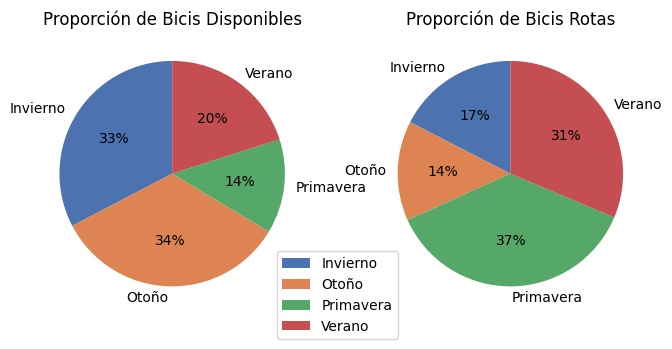

In [23]:
colors = sns.color_palette("deep")[0:5]
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].pie(
    resumen_de_proporciones["proporcion_bicis_sobre_espacio_total"],
    labels=resumen_de_proporciones.index,
    colors=colors,
    autopct="%.0f%%",
    startangle=90
)
ax[0].set_title("Proporción de Bicis Disponibles")

ax[1].pie(
    resumen_de_proporciones["proporcion_bicis_rotas_sobre_bicis_totales"],
    labels=resumen_de_proporciones.index,
    colors=colors,
    autopct="%.0f%%",
    startangle=90
)
ax[1].set_title("Proporción de Bicis Rotas")
ax[1].legend(bbox_to_anchor=(0.125, 0.25))

plt.show()

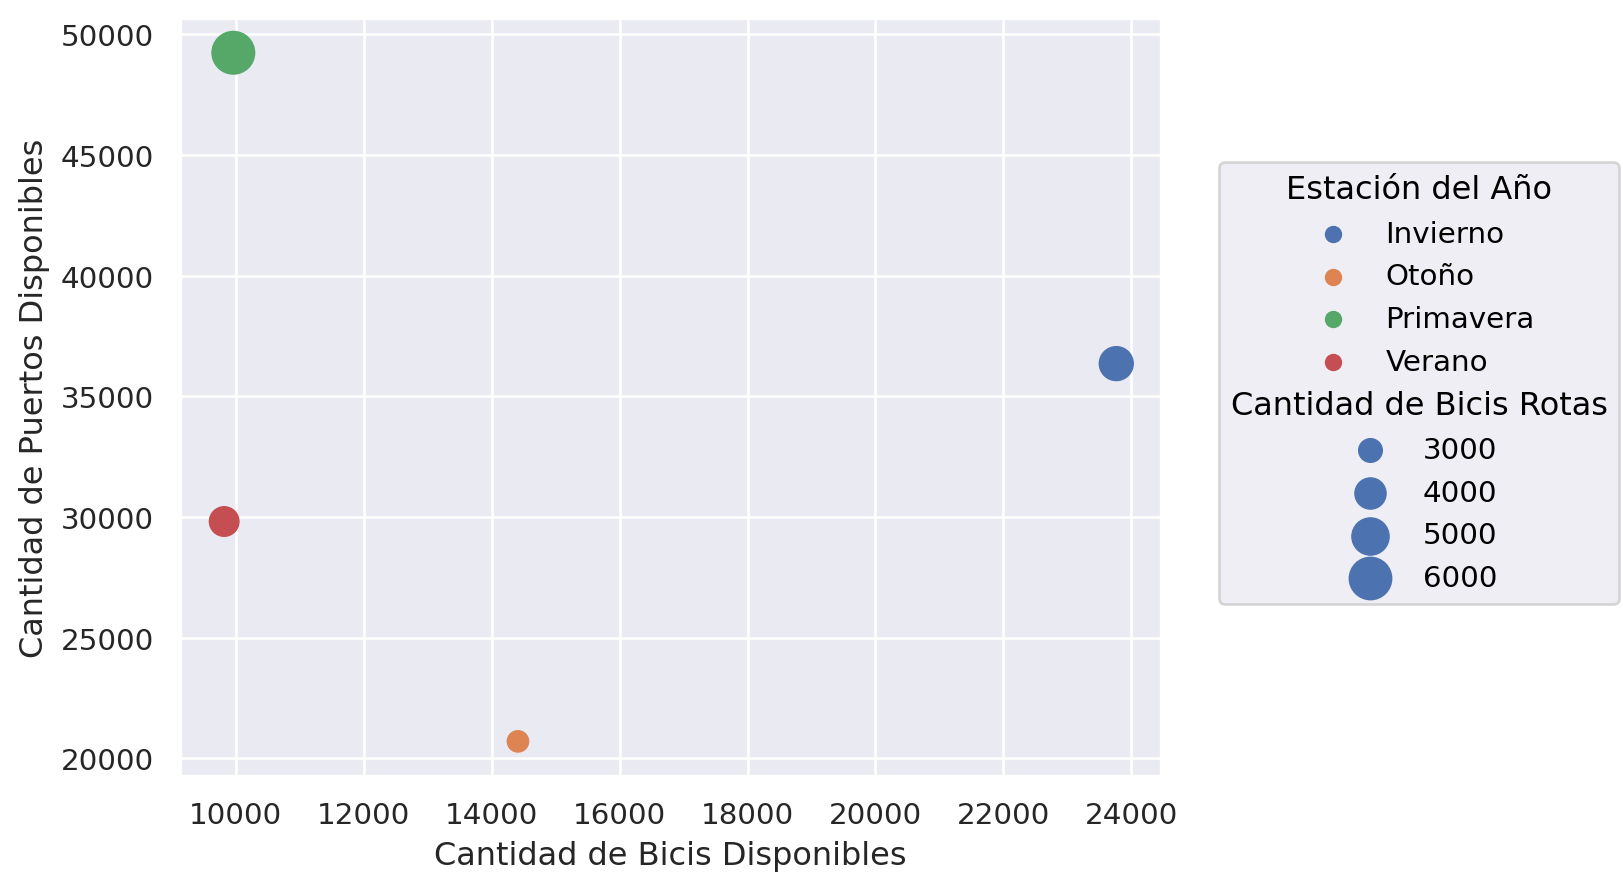

In [24]:
datos_resumidos = datos_eda_agrupados.groupby("estacion_anio", as_index=False).agg({
    "cantidad_bicis_disponibles": "sum",
    "cantidad_puertos_disponibles": "sum",
    "cantidad_bicis_rotas": "sum"
})

(
    so.Plot(
        data=datos_resumidos,
        x="cantidad_bicis_disponibles",
        y="cantidad_puertos_disponibles",
        color="estacion_anio",
        pointsize="cantidad_bicis_rotas"
    )
    .add(so.Dot())
    .scale(pointsize=(8, 16))
    .label(
        title="",
        x="Cantidad de Bicis Disponibles",
        y="Cantidad de Puertos Disponibles",
        color="Estación del Año",
        pointsize="Cantidad de Bicis Rotas"
    )
)

**Respuesta**: Podemos observar cómo el clima y la intensidad de uso afectan directamente al desgaste material de las unidades y la disponibilidad de espacios.
- En primavera hay un pico de actividad, donde la cantidad de bicis disponibles es bastante baja, mientras que la disponibilidad de puertos es elevada; agregando también que es la temporada con más unidades fuera de servicio por roturas, se podría inferir que esto se debe al elevado uso.
- En verano hay una baja simultánea de la cantidad de bicicletas y puertos disponibles, además de que aproximadamente un tercio de las bicicletas están rotas; considerando la temporalidad, se podría interpretar como un efecto de arrastre del desgaste provocado en primavera.
- En otoño se presenta el índice de bicicletas rotas más bajo y una la cantidad de bicicletas funcionales más alta que en verano, lo que podría indicar una mayor presencia de unidades operativas listas para el uso en una cantidad de puertos similar.
- En invierno se observa una alta cantidad de bicicletas disponibles, lo cual indica poco uso, especialmente al ver que tiene una alta proporción de unidades ancladas en relación al espacio total.

## Ejercicio 11

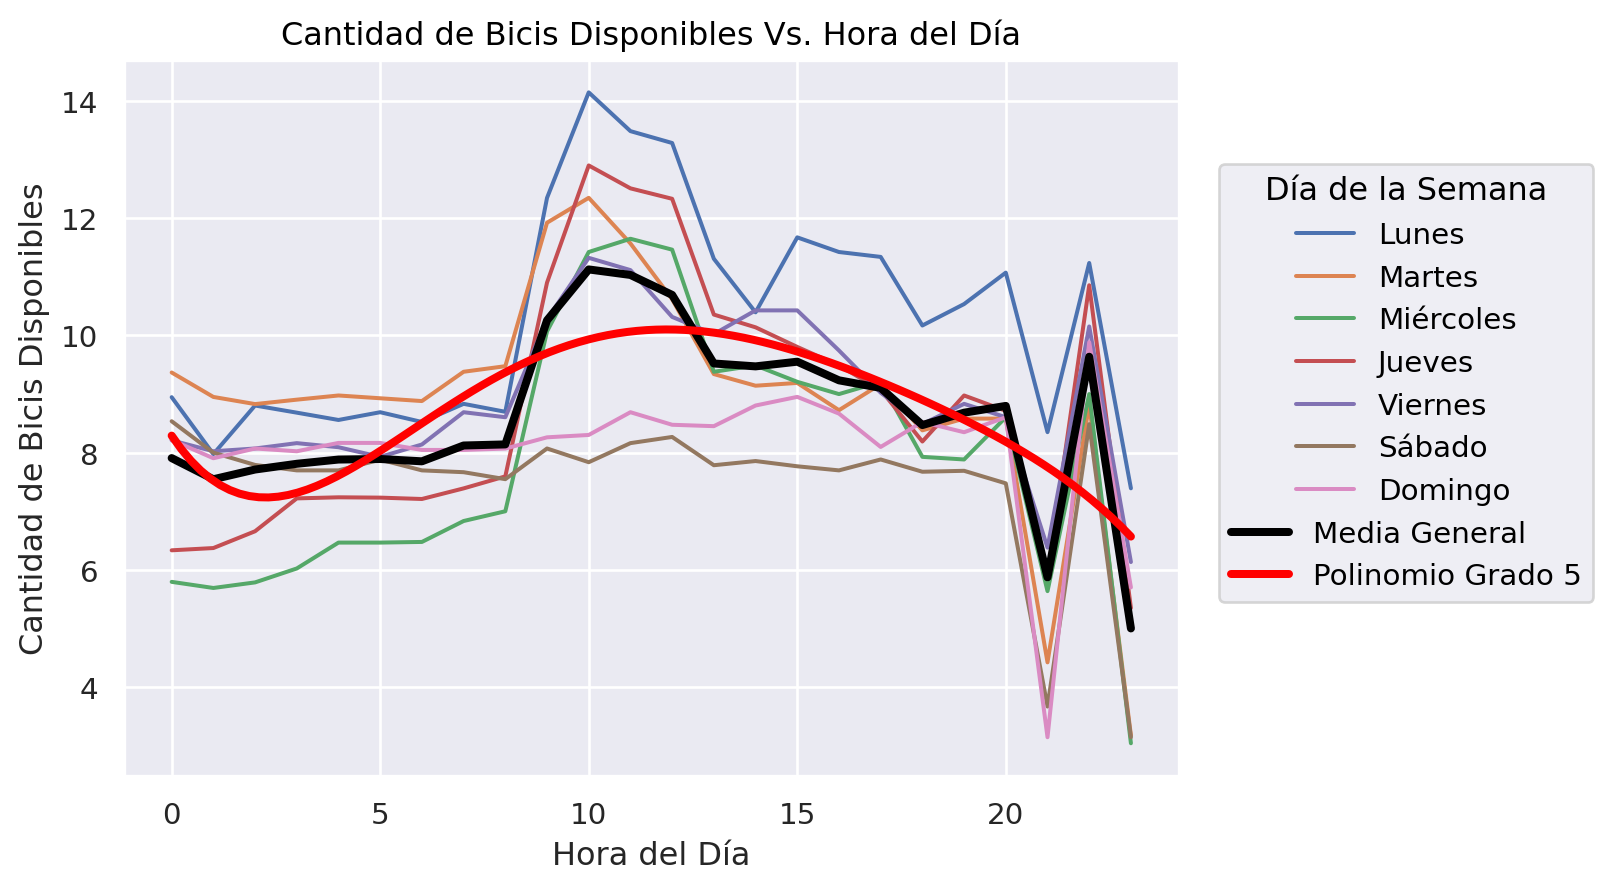

In [25]:
(
    so.Plot(
        data=datos_eda_agrupados,
        x="hora",
        y="cantidad_bicis_disponibles",
        color="dia_semana"
    )
    .add(so.Line(), so.Agg("mean"))
    .add(
        so.Line(linewidth=3, color="black"),
        so.Agg("mean"),
        color=None,
        label="Media General"
    )
    # tendencia general con polinomio de grado 5
    .add(
        so.Line(linewidth=3, color="red"),
        so.PolyFit(5),
        color=None,
        label="Polinomio Grado 5"
    )
    .label(
        title="Cantidad de Bicis Disponibles Vs. Hora del Día",
        x="Hora del Día",
        y="Cantidad de Bicis Disponibles",
        color="Día de la Semana"
    )
)

In [26]:
datos_eda_agrupados.groupby(["dia_semana","hora"])[[
    "proporcion_bicis_sobre_espacio_total",
    "proporcion_bicis_rotas_sobre_bicis_totales"
]].mean()

proporcion_bicis_sobre_espacio_total  \
dia_semana hora                                         
Domingo    0                                 0.256757   
           1                                 0.247024   
           2                                 0.252232   
           3                                 0.250744   
           4                                 0.255208   
...                                               ...   
Viernes    19                                0.276042   
           20                                0.268895   
           21                                0.199353   
           22                                0.317308   
           23                                0.191667   

                 proporcion_bicis_rotas_sobre_bicis_totales  
dia_semana hora                                              
Domingo    0                                       0.362572  
           1                                       0.389899  
           2                                       0.374515  
           3                                       0.369788  
           4                                       0.367084  
...                                                     ...  
Viernes    19                                      0.366079  
           20                                      0.399654  
           21                                      0.460097  
           22                                      0.385897  
           23                                      0.457584  

[168 rows x 2 columns]

[]

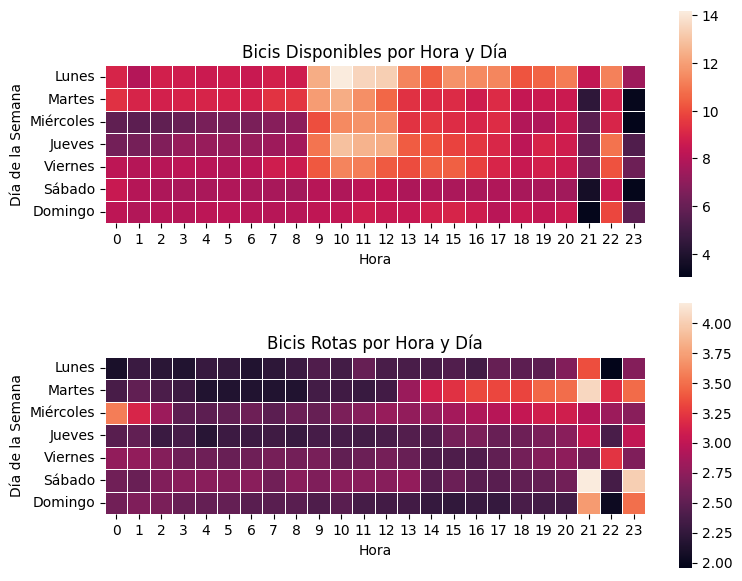

In [27]:
variables = [
    ("cantidad_bicis_disponibles", "Bicis Disponibles por Hora y Día"),
    ("cantidad_bicis_rotas", "Bicis Rotas por Hora y Día"),
]

fig, ax = plt.subplots(len(variables), 1, figsize=(8, 6))
for i, (variable, titulo) in enumerate(variables):
    df_heatmap = (
        datos_eda_agrupados
            .groupby(["dia_semana","hora"])[[variable]]
            .mean()
            .reset_index()
            .pivot(
                index="dia_semana",
                columns="hora",
                values=variable
            ).reindex([
                "Lunes", "Martes", "Miércoles",
                "Jueves", "Viernes", "Sábado", "Domingo"
            ])
    )

    sns.heatmap(
        data=df_heatmap,
        linewidths=0.5,
        square=True,
        ax=ax[i]
    )
    ax[i].set_title(titulo)
    ax[i].set_xlabel("Hora")
    ax[i].set_ylabel("Día de la Semana")

plt.tight_layout()
    
plt.plot()

**Respuesta**: Al analizar el flujo diario, podemos observar cómo el comportamiento de las estaciones varía según el día y la hora. En primer lugar, existe una clara distinción entre los días de semana y los fines de semana: mientras que de lunes a viernes se registran los picos más altos de disponibilidad en los anclajes (especialmente los lunes); los sábados y domingos muestran curvas mucho más planas y bajas, indicando un posible uso ecreativo más pausado, donde las bicicletas no regresan tan rápido a las estaciones. En segundo lugar, la tendencia horaria general (marcada por las líneas negra y roja) revela que las estaciones alcanzan su punto máximo de disponibilidad cerca del mediodía. Al ser un horario de permanencia en oficinas o aulas, podría ser una ventana de tiempo donde se retiran menos bicicletas de las que fueron entregadas. A partir de la tarde, se inicia un descenso gradual que termina en una caída fuerte durante la noche, momento en el que la cantidad de bicicletas en las estaciones llega a su mínimo; esto refleja probablemente el último flujo masivo de viajes de regreso a zonas por fuera de estas estaciones.

## Ejercicio 12


**Respuesta**: En el gráfico `Cantidad de Bicis Disponibles Vs. Hora del Día` se presentan picos extraños en las últimas horas de la noche. Se puede ver un descenso, ascenso y descenso repentino en la cantidad de bicicletas que es común a todos los días. Este mismo comportamiento se puede ver en el mapa de calor de las bicicletas rotas, pero en espejo, aunque no tan marcado. Una posible interpreación es que en ese horario haya una rotación de bicicletas en las estaciones, con el objetivo de que siempre haya al menos algunas bicicletas, pero esto requeriría de tener más datos para poder verificarlo.

---
# Análisis Exploratorio

Para esto primero se van a obtener los datos de las estaciones de EcoBici a partir de la API de transporte. Luego se crearán dataframes desde archivos CSV y sus tablas correspondientes en SQL, puesto que algunos de los procesamientos y análisis se harán

In [28]:
credenciales = {
    "client_id": "f3429f52737b4e019607007f7454602f",
    "client_secret": "E09120C8BC17468fBd98Bd7F37173674"
}
response = requests.get(
    url="https://apitransporte.buenosaires.gob.ar/ecobici/gbfs/stationInformation?",
    params=credenciales
).json()
df_informacion = pd.DataFrame(response["data"]["stations"])
df_informacion = df_informacion[["station_id", "lat", "lon", "capacity"]]

df_clima = pd.read_csv("./clima.csv")
df_clima["fecha"] = pd.to_datetime(df_clima["fecha"])
df_clima["temporada"] = df_clima.apply(determinar_estacion_anio, axis=1)

conexion = sqlite3.connect(":memory:")

tablas_a_agregar = [
    ("estaciones", df_informacion),
    ("datos",      datos_limpios),
    ("clima",      df_clima)
]
for (nombre, df) in tablas_a_agregar:
    cantidad = df.to_sql(nombre, conexion, index=False, if_exists="replace")
    print(f"Se agregaron {cantidad} de filas a la tabla {nombre}")

Se agregaron 396 de filas a la tabla estaciones
Se agregaron 13206 de filas a la tabla datos
Se agregaron 783 de filas a la tabla clima


Se plantea la siguiente pregunta: _¿cuáles son las semanas con mayor uso de bicis? ¿corresponden con los inicios de los cuatrimestres de la FCEyN / FADU / CBC?_

Primero, se crea una tabla `calendario` la cual posee las fechas de inicio y fin de cada instancia del año académico.

In [29]:
conexion.executescript("""
DROP TABLE IF EXISTS calendario;
CREATE TABLE calendario (
    instancia TEXT NON NULL,
    inicio    TEXT NON NULL,
    fin       TEXT NON NULL
);

INSERT INTO calendario(instancia, inicio, fin) VALUES
("Curso de Verano",        "2025-01-27", "2025-03-15"),
("Primer Cuatrimestre",    "2025-03-17", "2025-07-05"),
("Vacaciones de Invierno", "2025-07-06", "2025-08-17"),
("Segundo Cuatrimestre",   "2025-08-18", "2025-12-06"),
("Vacaciones de Verano",   "2025-12-07", "2026-01-25"),
("Curso de Verano",        "2026-01-26", "2026-03-14");
""")

Ahora, para cada semana del año, se calcula el promedio de bicis que se encuentran en uso; a este promedio se le adjunta el número de semana y en qué momento del año académico se está. Estos datos se colocan dentro del DataFrame `df_media_semanal`, y se genera un gráfico de líneas que muestra la relación entre el promedio de ocupación y la semana en cuestión, separados por momento académico.

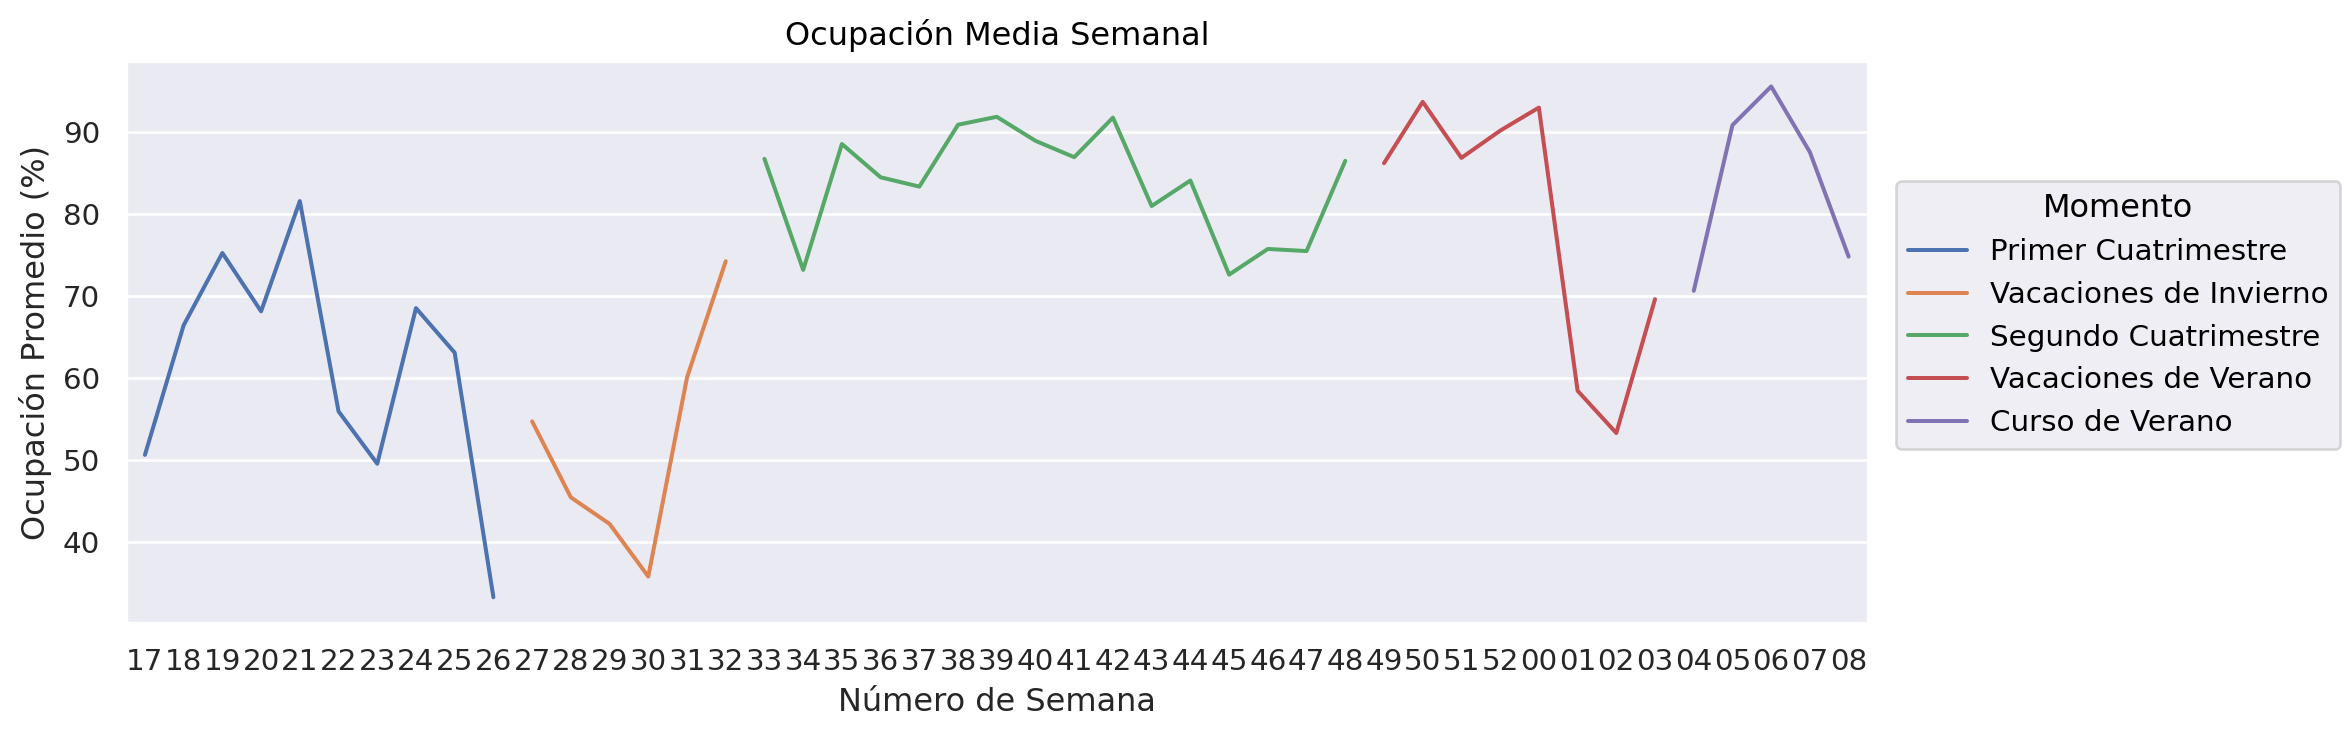

In [30]:
df_media_semanal = pd.read_sql_query("""
SELECT
    STRFTIME("%W", d.fecha) AS semana,
    c.instancia,
    AVG(100.0 - (100.0 * d.bicis_disponibles / (1.0 * e.capacity))) AS ocupacion_media
FROM datos d
INNER JOIN calendario c ON DATE(d.fecha) BETWEEN c.inicio AND c.fin
INNER JOIN estaciones e ON e.station_id = d.estacion
GROUP BY STRFTIME("%W-%Y", d.fecha)
ORDER BY d.fecha;
""", conexion)

(
  so.Plot(data=df_media_semanal, x="semana", y="ocupacion_media", color="instancia")
    .add(so.Line())
    .layout(size=(10, 4))
    .label(
        title="Ocupación Media Semanal",
        color="Momento",
        x="Número de Semana",
        y="Ocupación Promedio (%)"
    )
)

A simple vista del gráfico se puede ver que existe una diferencia marcada entre el uso de bicicletas en vacaciones de invierno y de verano. Uno esperaría que en vacaciones de verano el uso promedio baje, de una forma similar que en invierno. Esto podría sugerir que existe otro factor que influencia en el uso de las bicicletas, es decir, no son usadas únicamente por estudiantes. A continuación se realiza el mismo gráfico, pero excluyendo ambos intervalos vacacionales, e incluyendo líneas de tendencia; a su vez, se plantea la siguiente hipótesis:

**Hipótesis 1**: Las semanas de inicio de cuatrimestre presentan mayor uso de bicicletas.

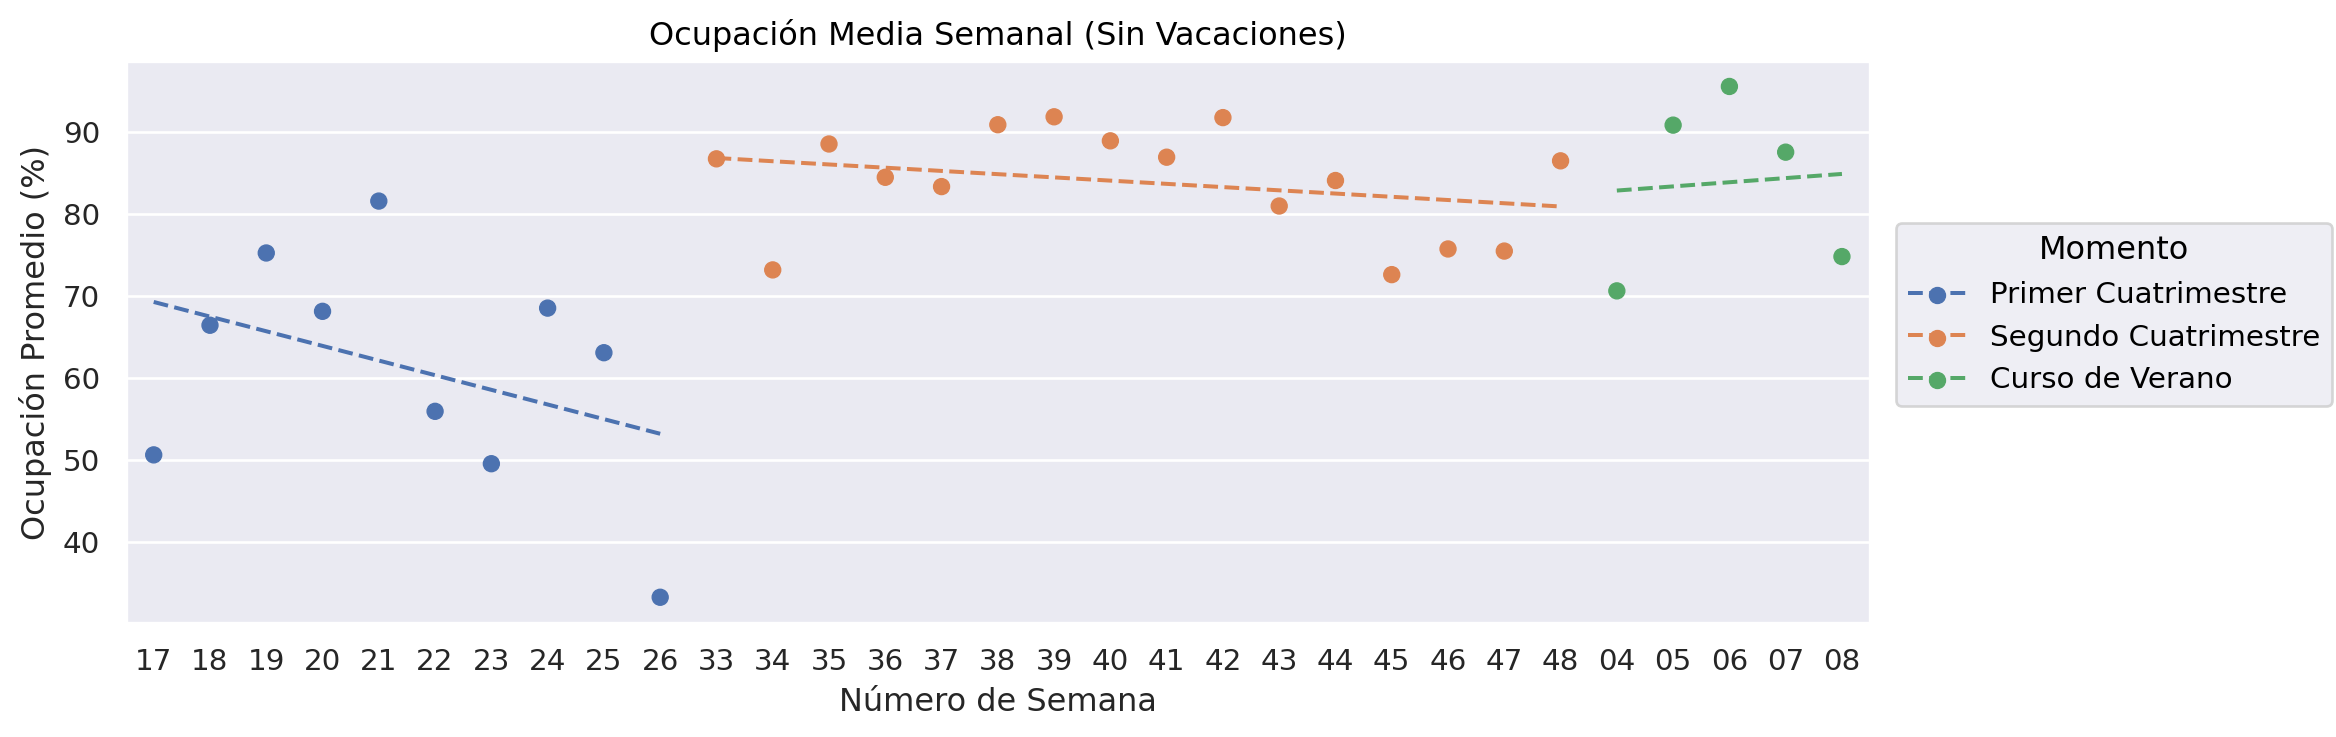

In [31]:
(
  so.Plot(
        data=df_media_semanal[df_media_semanal["instancia"].isin(["Vacaciones de Invierno", "Vacaciones de Verano"]) == False],
        x="semana",
        y="ocupacion_media",
        color="instancia"
    )
    .add(so.Dot())
    .add(so.Line(linestyle="--"), so.PolyFit(1))
    .layout(size=(10, 4))
    .label(
        title="Ocupación Media Semanal (Sin Vacaciones)",
        color="Momento",
        x="Número de Semana",
        y="Ocupación Promedio (%)"
    )
)

Teniendo este gráfico, se puede ver que las pendientes son negativas para el primer y segundo cuatrimestre. Esto sugiere que el uso promedio comienza alto y luego, a medida que pasa cada cuatrimestre, va bajando. El caso de la recta del curso de verano también parece compartir esta tendencia, aunque como son pocos datos no se puede garantizar que cumpla con la misma tendencia.

En cualquier caso, se puede ver que las semanas con mayor uso de bicicletas suelen ser las primeras de cada cuatrimestre, aunque la forma de cada curva sugiere la existencia de otros factores que influencian el uso.

Esto último motiva plantear la siguiente hipótesis:

**Hipótesis 2**: Existe una relación entre el uso de bicicletas y la estación del año, a mayor temperatura, mayor uso.

Uno esperaría que sí, ya que es más problable que alguien vaya en bicicleta cuando hace calor que cuando hace frío. Sin embargo, con la intuición no es suficiente, así que se va realizar un gráfico que muestre la existencia de dicha relación.

[]

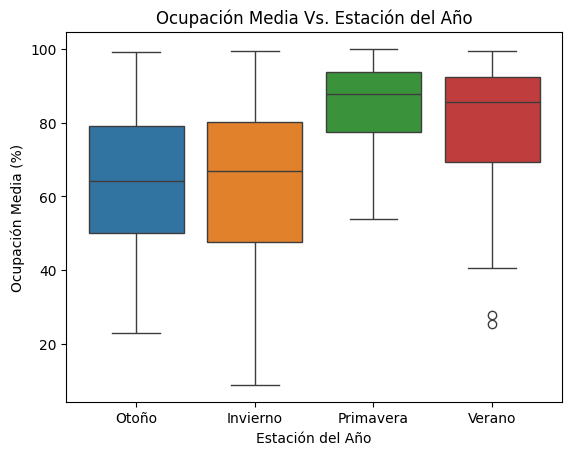

In [32]:
df_media_estacional = pd.read_sql_query("""
SELECT 
    d.fecha,
    d.estacion_anio AS temporada,
    AVG(100.0 - (100.0 * d.bicis_disponibles / (1.0 * e.capacity))) AS ocupacion_media
FROM datos d
INNER JOIN estaciones e ON e.station_id = d.estacion
GROUP BY d.fecha
""", conexion)
df_media_estacional["fecha"] = pd.to_datetime(df_media_estacional["fecha"])

ax = sns.boxplot(
    data=df_media_estacional,
    x="temporada",
    y="ocupacion_media",
    hue="temporada"
)
ax.set_title("Ocupación Media Vs. Estación del Año")
ax.set_xlabel("Estación del Año")
ax.set_ylabel("Ocupación Media (%)")
ax.plot()

Se puede ver que el rango de valores de la ocupación media es más extenso en otoño e invierno, mientras que en primavera y verano están concentrados en ocupaciones altas. Esto refuerza la hipótesis de que en algunas estaciones del año hay más uso que en otras. La causa más probable es la temperatura: las personas no van a tender a usar las bicicletas si hace mucho frío o mucho calor. Para analizar la influencia de este factor, se van a usar los datos meteorológicos de cada día.

Para ver esta relación primero va a analizar la distribución del porcentaje de ocupación para cada valor de temperatura; y luego, se analizará una posible categorización de "mucho frío" y "mucho calor", para ver cómo influye ese factor.

In [33]:
df_medias = pd.read_sql_query("""
SELECT
    d.fecha,
    d.dia_semana,
    c.temporada,
    AVG(100.0 - (d.bicis_disponibles * 100.0 / e.capacity)) AS ocupacion_media,
    AVG(c.tavg) AS temp_media,
    AVG(c.prcp) AS precipitaciones_media
FROM datos d
INNER JOIN clima c ON c.fecha = d.fecha
INNER JOIN estaciones e ON e.station_id = d.estacion
GROUP BY d.fecha;
""", conexion)

df_medias.head()

,fecha,dia_semana,temporada,ocupacion_media,temp_media,precipitaciones_media
0,2025-04-28 00:00:00,Lunes,Otoño,60.000000,16.9,0.0
1,2025-04-29 00:00:00,Martes,Otoño,46.992754,16.6,0.0
2,2025-04-30 00:00:00,Miércoles,Otoño,60.643939,18.0,0.0
3,2025-05-01 00:00:00,Jueves,Otoño,37.608696,18.2,0.0
4,2025-05-02 00:00:00,Viernes,Otoño,49.891304,19.0,0.0


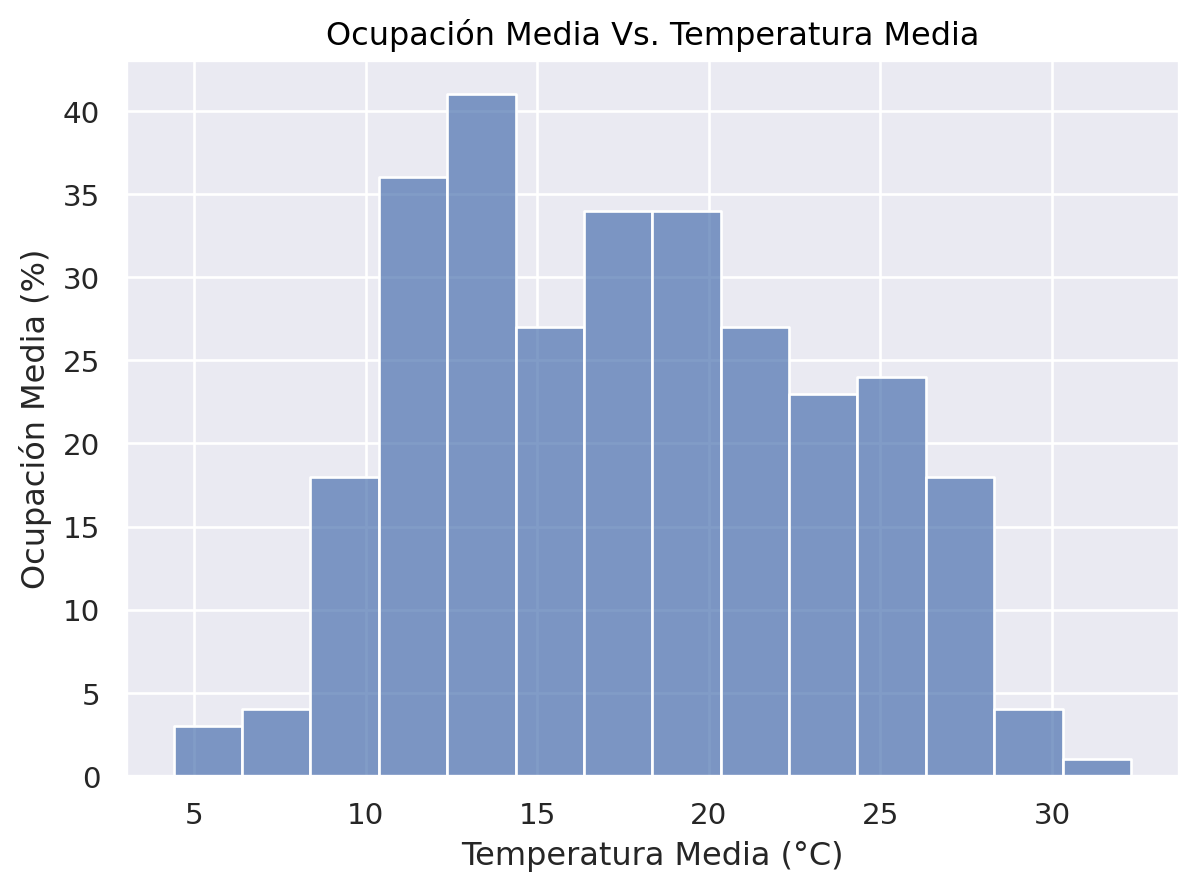

In [34]:
(
    so.Plot(
        data=df_medias,
        x="temp_media",
        y="ocupacion_media",
    )
    .add(so.Bars(), so.Hist(binwidth=2))
    .label(
        title="Ocupación Media Vs. Temperatura Media",
        x="Temperatura Media (°C)",
        y="Ocupación Media (%)"
    )
)

En este gráfico se puede ver que, efectivamente, la gente usa las bicicletas mayoritariamente en temperaturas intermedias, ya que en los extremos se puede ver un marcado descenso del porcentaje de ocupación. Por otro lado, también se puede analizar la relación entre las precipitaciones y el uso de bicicletas.

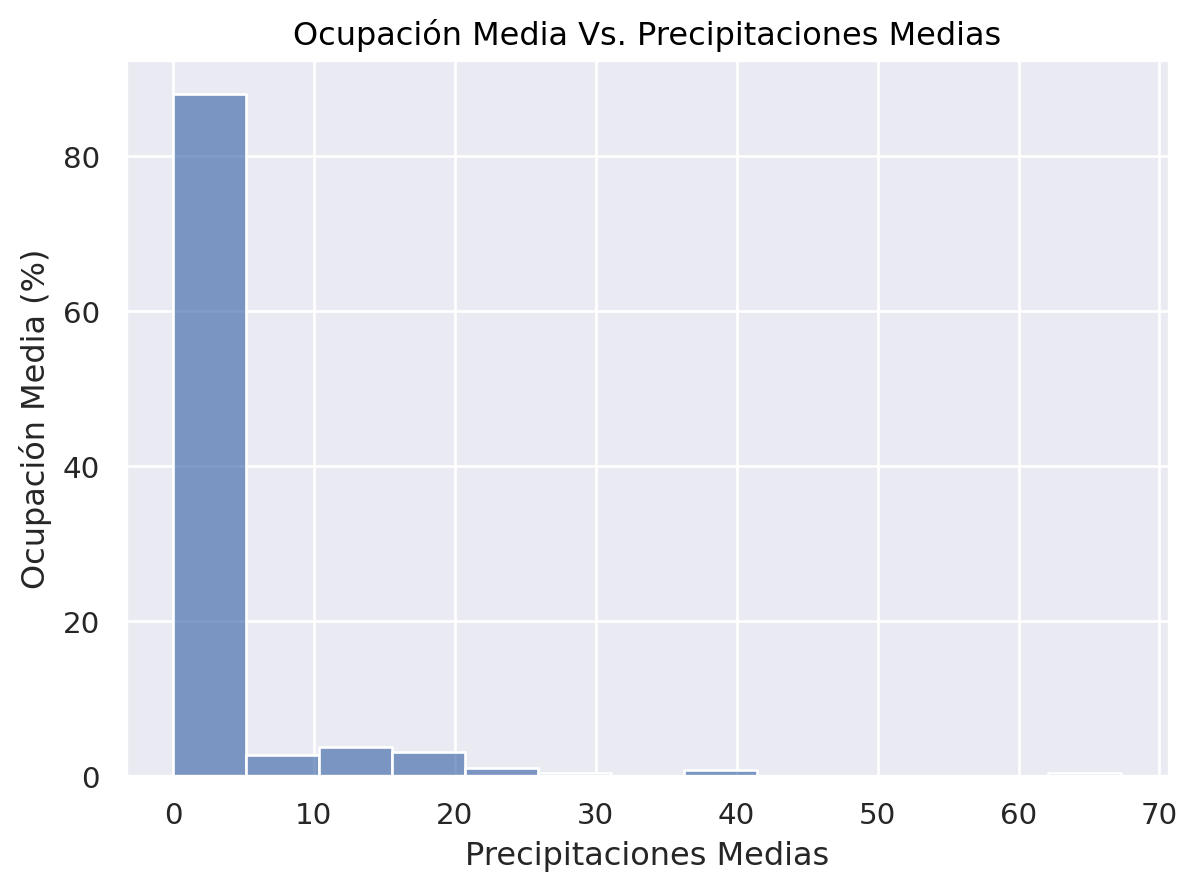

In [35]:
(
    so.Plot(
        data=df_medias,
        x="precipitaciones_media",
        y="ocupacion_media",
    )
    .add(so.Bars(), so.Hist(binwidth=5, stat="percent"))
    .label(
        title="Ocupación Media Vs. Precipitaciones Medias",
        x="Precipitaciones Medias",
        y="Ocupación Media (%)"
    )
)

En este caso se puede ver que más del 80% de los viajes ocurren con precipitaciones médias cercanas a cero. Esto tiene bastante sentido, ya que es esperable que las personas no usen bicicleta cuando llueve, ya que prefieren otros medios de transporte que eviten que se mojen.

Ahora, para categorizar qué es "mucho frío" y "mucho calor", como depende de cada persona, lo que se hará es agrupar por estación y año, y para cada par calcular los cuartiles 0.25 y 0.75. De esta forma se estable que hace "mucho frío" si la temperatura media es menor que el cuartil 0.25; mientras que hace "mucho calor" si es mayor al cuartil 0.75. Pero, ¿por qué separar en estaciones y año? La idea es que, por ejemplo, 25 °C en verano es "normal", mientras que 25 °C en invierno es un día de "mucho calor".

In [36]:
df_rangos_clima_temporadas = pd.read_sql_query("""
SELECT
    STRFTIME("%Y", c.fecha) as año,
    c.tavg,
    c.temporada
FROM clima c
""", conexion)
df_rangos_clima_temporadas = (
    df_rangos_clima_temporadas
        .groupby(["año", "temporada"])["tavg"]
        .quantile([0.25, 0.75])
        .unstack()
)
df_rangos_clima_temporadas.columns = ["t_min", "t_max"]
df_rangos_clima_temporadas = df_rangos_clima_temporadas.reset_index()
df_rangos_clima_temporadas.to_sql("rangos_clima_temporadas", conexion, index=False, if_exists="replace")

display(df_rangos_clima_temporadas)

,año,temporada,t_min,t_max
0,2024,Invierno,9.550,14.225
1,2024,Otoño,13.275,19.275
2,2024,Primavera,18.200,22.600
3,2024,Verano,22.750,25.350
4,2025,Invierno,10.575,14.625
5,2025,Otoño,12.900,19.300
6,2025,Primavera,17.000,22.150
7,2025,Verano,23.500,26.650
8,2026,Verano,23.200,26.175


Una vez obtenidos los rangos de temperaturas, se procede a generar una nueva tabla, y dataframe, donde se agreguen los datos de las estaciones y temperatura, con los rangos, tal que se categorice la temperatura para cada día. Luego se hace un boxplot de los datos para analizarlos.

In [37]:
conexion.executescript("""
DROP VIEW IF EXISTS datos_con_valoraciones;
CREATE VIEW datos_con_valoraciones AS
SELECT
    STRFTIME("%Y", c.fecha) as año,
    d.fecha,
    c.temporada,
    AVG(100.0 - (d.bicis_disponibles * 100.0 / e.capacity)) AS ocupacion_media,
    (
        CASE WHEN c.tavg < rct.t_min THEN "Mucho Frío"
             WHEN c.tavg > rct.t_max THEN "Mucho Calor"
             ELSE "Normal"
        END
    ) AS valoracion_temp
FROM datos d
INNER JOIN clima c ON c.fecha = d.fecha
INNER JOIN estaciones e ON e.station_id = d.estacion
INNER JOIN rangos_clima_temporadas rct
    ON rct.temporada = d.estacion_anio
    AND rct.año = STRFTIME("%Y", d.fecha)
GROUP BY d.fecha;
""")

df_datos_con_valoraciones = pd.read_sql_query("""
SELECT * FROM datos_con_valoraciones;
""", conexion)
df_datos_con_valoraciones["fecha"] = pd.to_datetime(df_datos_con_valoraciones["fecha"])
df_datos_con_valoraciones.head()

,año,fecha,temporada,ocupacion_media,valoracion_temp
0,2025,2025-04-28,Otoño,60.000000,Normal
1,2025,2025-04-29,Otoño,46.992754,Normal
2,2025,2025-04-30,Otoño,60.643939,Normal
3,2025,2025-05-01,Otoño,37.608696,Normal
4,2025,2025-05-02,Otoño,49.891304,Normal


Text(0, 0.5, 'Ocupación Media (%)')

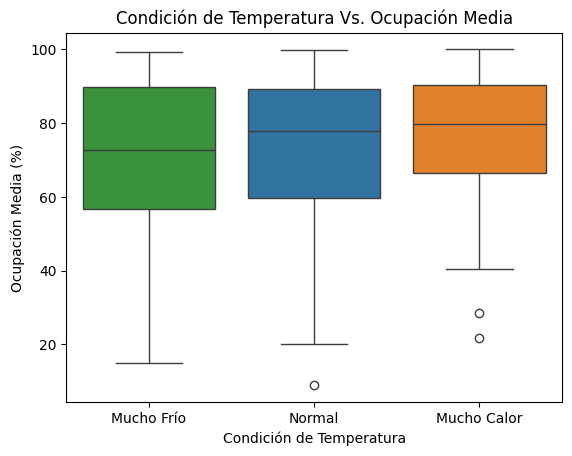

In [38]:
ax = sns.boxplot(
    data=df_datos_con_valoraciones,
    x="valoracion_temp",
    y="ocupacion_media",
    hue="valoracion_temp",
    order=["Mucho Frío", "Normal", "Mucho Calor"],
)
ax.set_title("Condición de Temperatura Vs. Ocupación Media")
ax.set_xlabel("Condición de Temperatura")
ax.set_ylabel("Ocupación Media (%)")

Se puede ver que la ocupación media se mantiene relativamente pareja entre cada una de las catagorías. Esto sugiere que no hay mucha variación entre las interpretaciones de las temperaturas individuales, sino que varía mucho más con el momento del año y la temperatura en sí.

---
# Regresión Lineal

In [39]:
viajes_por_dia = pd.read_csv("viajes_diarios.csv")
viajes_por_dia.head()

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_567,destino_568,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,0,0
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,0,0
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,0,0
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,0,0
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,0,0


In [40]:
viajes_por_dia["fecha"] = pd.to_datetime(viajes_por_dia["fecha"])
viajes_por_dia.head()

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_567,destino_568,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,0,0
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,0,0
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,0,0
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,0,0
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Reutilizamos la función determinar_estacion_anio
viajes_por_dia["estacion_anio"] = viajes_por_dia.apply(determinar_estacion_anio, axis=1)

viajes_por_dia.head()

/tmp/ipykernel_180584/3754202244.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  viajes_por_dia["estacion_anio"] = viajes_por_dia.apply(determinar_estacion_anio, axis=1)


,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_568,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577,estacion_anio
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,0,Verano
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,0,Verano
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,0,Verano
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,0,Verano
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,0,Verano


In [42]:
dias_en_español = {
    0: "Lunes",
    1: "Martes",
    2: "Miércoles",
    3: "Jueves",
    4: "Viernes",
    5: "Sábado",
    6: "Domingo"
}

viajes_por_dia["dia_semana"] = viajes_por_dia["fecha"].dt.dayofweek.map(dias_en_español)

# Se agrega viajes_por_dia como una tabla en SQL
viajes_por_dia.to_sql("viajes_diarios", conexion, index=False, if_exists="replace")

viajes_por_dia[["fecha", "estacion_anio", "dia_semana"]].head()

/tmp/ipykernel_180584/2382871361.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  viajes_por_dia["dia_semana"] = viajes_por_dia["fecha"].dt.dayofweek.map(dias_en_español)


,fecha,estacion_anio,dia_semana
0,2024-01-01,Verano,Lunes
1,2024-01-02,Verano,Martes
2,2024-01-03,Verano,Miércoles
3,2024-01-04,Verano,Jueves
4,2024-01-05,Verano,Viernes


In [43]:
datos_eda_agrupados.head()

,fecha,hora,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles,dia_semana,dia,mes,anio,estacion_anio,cantidad_total_de_espacio,proporcion_bicis_sobre_espacio_total,proporcion_bicis_rotas_sobre_bicis_totales
0,2025-04-28,23,14,3,15,Lunes,28,4,2025,Otoño,32,0.4375,0.176471
1,2025-04-29,0,16,3,13,Martes,29,4,2025,Otoño,32,0.5000,0.157895
2,2025-04-29,1,16,3,13,Martes,29,4,2025,Otoño,32,0.5000,0.157895
3,2025-04-29,2,16,3,13,Martes,29,4,2025,Otoño,32,0.5000,0.157895
4,2025-04-29,3,16,3,13,Martes,29,4,2025,Otoño,32,0.5000,0.157895


A partir de esto se pueden graficar las ubicaciones geográficas de cada estación, junto con la distinción de cuál es la estación 5.

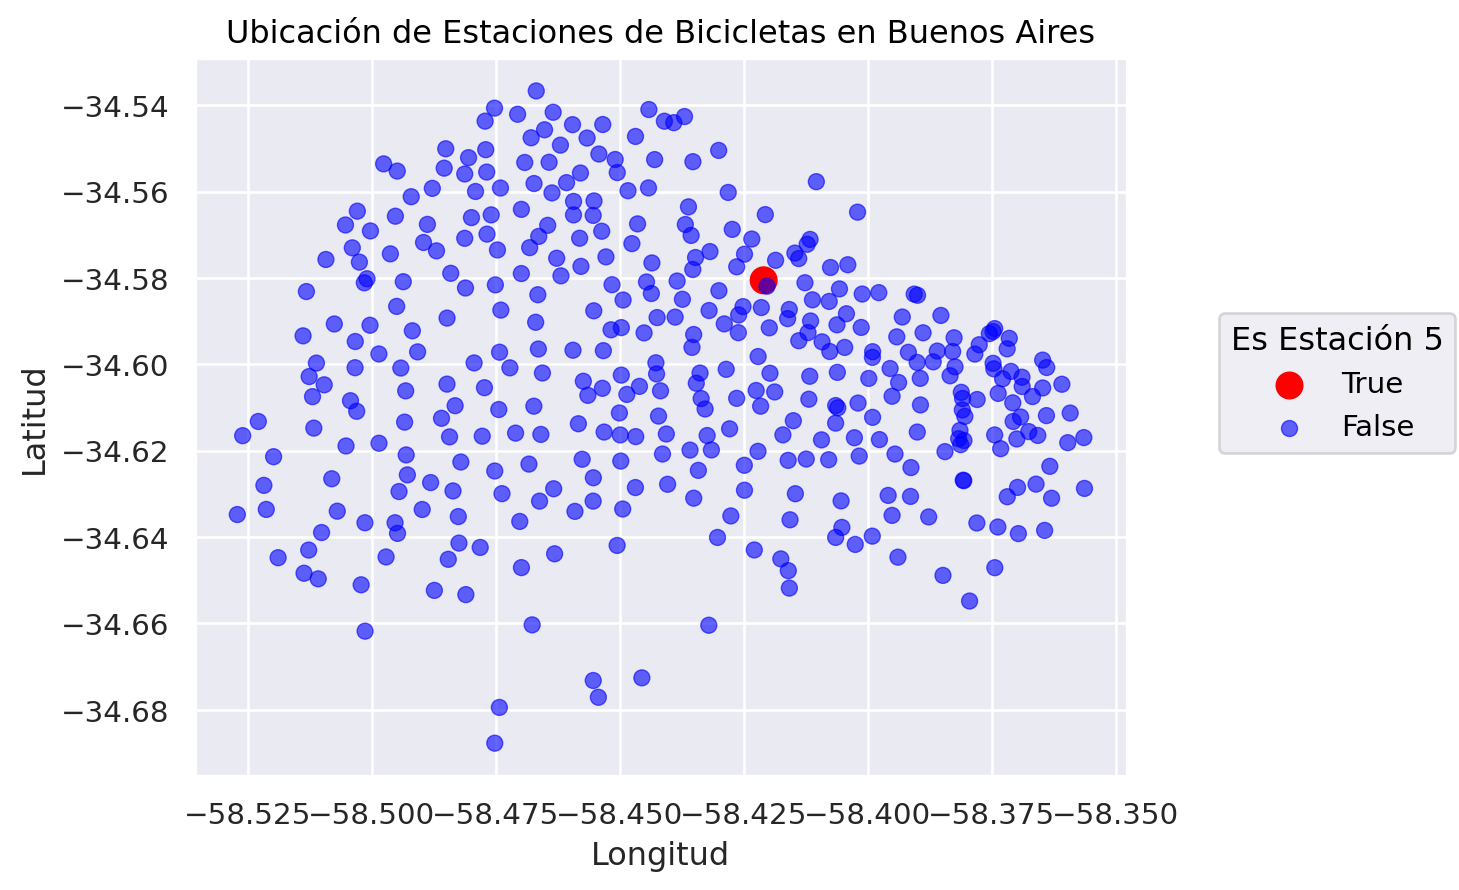

In [44]:
# Crear la columna es_estacion_5
df_informacion["es_estacion_5"] = df_informacion["station_id"] == "5"

(
    so.Plot(
        data=df_informacion,
        x="lon",
        y="lat",
        alpha="es_estacion_5",
        color="es_estacion_5",
        pointsize="es_estacion_5"
    )
    .add(so.Dot())
    .label(
        title="Ubicación de Estaciones de Bicicletas en Buenos Aires",
        x="Longitud",
        y="Latitud",
        alpha="Es Estación 5",
        color="Es Estación 5",
        pointsize="Es Estación 5",
    )
    .scale(
        alpha=[1, 0.6],
        color=["red", "blue"],
        pointsize=[10, 6]
    )
    .theme({**so.Plot.config.theme, "axes.grid": True})
)


Ahora se quiere calcular la distancia entre todas las estaciones y la estación 5, junto con un "puntaje" para hacer un orden entre estaciones.

In [45]:
# Función de Haversine para calcular distancia entre dos puntos geográficos
def haversine(lat1, lon1, lat2, lon2):
    """
    Calcula la distancia en kilómetros entre dos puntos geográficos
    usando la fórmula de Haversine
    """
    # Radio de la Tierra en kilómetros
    R = 6371.0
    
    # Convertir grados a radianes
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    # Diferencias
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Fórmula de Haversine
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Distancia en kilómetros
    distancia = R * c
    
    return distancia

# Obtener las coordenadas de la estación 5
estacion_5 = df_informacion[df_informacion["station_id"] == "5"].iloc[0]

# Calcular la distancia de cada estación a la estación 5 (en kilómetros)
df_informacion["distancia_a_est5_km"] = haversine(
    df_informacion["lat"], 
    df_informacion["lon"], 
    estacion_5["lat"], 
    estacion_5["lon"]
)

# Crear un puntaje de cercanía (inverso a la distancia)
max_distancia = df_informacion["distancia_a_est5_km"].max()
df_informacion["puntaje_cercania_est5"] = 100 * (1 - df_informacion["distancia_a_est5_km"] / max_distancia)

# Verificar resultados
print(df_informacion[["station_id", "distancia_a_est5_km", "puntaje_cercania_est5"]].head(10))
print(f"\nEstación 5 (debería tener distancia 0 y puntaje 100):")
print(df_informacion[df_informacion["station_id"] == "5"][["station_id", "distancia_a_est5_km", "puntaje_cercania_est5"]])

  station_id  distancia_a_est5_km  puntaje_cercania_est5
0          2             4.434498              65.658690
1          3             5.907115              54.254556
2          4             5.383199              58.311831
3          5             0.000000             100.000000
4          6             7.100328              45.014169
5          7             4.651335              63.979481
6          8             4.322352              66.527165
7          9             1.326374              89.728393
8         12             3.238620              74.919720
9         13             3.558527              72.442322

Estación 5 (debería tener distancia 0 y puntaje 100):
  station_id  distancia_a_est5_km  puntaje_cercania_est5
3          5                  0.0                  100.0


In [46]:
df_informacion.describe()

,lat,lon,capacity,distancia_a_est5_km,puntaje_cercania_est5
count,396.000000,396.000000,396.000000,396.000000,396.000000
mean,-34.600563,-58.439136,18.686869,5.254313,59.309938
std,0.029011,0.043658,5.299432,2.537950,19.654202
min,-34.687767,-58.527098,8.000000,0.000000,0.000000
25%,-34.620185,-58.474435,16.000000,3.464168,46.364089
50%,-34.601951,-58.441552,20.000000,5.089487,60.586372
75%,-34.580460,-58.404522,20.000000,6.926012,73.173046
max,-34.536691,-58.356259,54.000000,12.913014,100.000000


Ahora se van a generar etiquetas para categorizar las cercanías a la estación 5

In [47]:
# Crear etiquetas de cercanía basadas en quartiles
[puntaje_min, puntaje_max] = df_informacion["puntaje_cercania_est5"].quantile([0.10, 0.80]).to_list()
def etiquetar_cercania(puntaje):
    if puntaje >= puntaje_max:
        return "Cerca"
    elif puntaje >= puntaje_min:
        return "Media"
    else:
        return "Lejos"

# Aplicar la función a cada fila
df_informacion["etiqueta_cercania"] = df_informacion["puntaje_cercania_est5"].apply(etiquetar_cercania)

# Verificar la distribución
print(df_informacion["etiqueta_cercania"].value_counts())
print("\nEjemplos:")
print(df_informacion[["station_id", "puntaje_cercania_est5", "etiqueta_cercania"]].head(10))
print(f"\nEstación 5:")
print(df_informacion[df_informacion["station_id"] == "5"][["station_id", "puntaje_cercania_est5", "etiqueta_cercania"]])

etiqueta_cercania
Media    276
Cerca     80
Lejos     40
Name: count, dtype: int64

Ejemplos:
  station_id  puntaje_cercania_est5 etiqueta_cercania
0          2              65.658690             Media
1          3              54.254556             Media
2          4              58.311831             Media
3          5             100.000000             Cerca
4          6              45.014169             Media
5          7              63.979481             Media
6          8              66.527165             Media
7          9              89.728393             Cerca
8         12              74.919720             Media
9         13              72.442322             Media

Estación 5:
  station_id  puntaje_cercania_est5 etiqueta_cercania
3          5                  100.0             Cerca


In [48]:
df_informacion.loc[df_informacion["station_id"] == "5", "etiqueta_cercania"] = "Es estación 5"
df_informacion.head()

,station_id,lat,lon,capacity,es_estacion_5,distancia_a_est5_km,puntaje_cercania_est5,etiqueta_cercania
0,2,-34.592424,-58.374710,40,False,4.434498,65.658690,Media
1,3,-34.612207,-58.369129,28,False,5.907115,54.254556,Media
2,4,-34.603008,-58.368856,20,False,5.383199,58.311831,Media
3,5,-34.580550,-58.420954,42,True,0.000000,100.000000,Es estación 5
4,6,-34.628526,-58.369758,20,False,7.100328,45.014169,Media


Además se puede realizar el gráfico de la categorización por cercanía

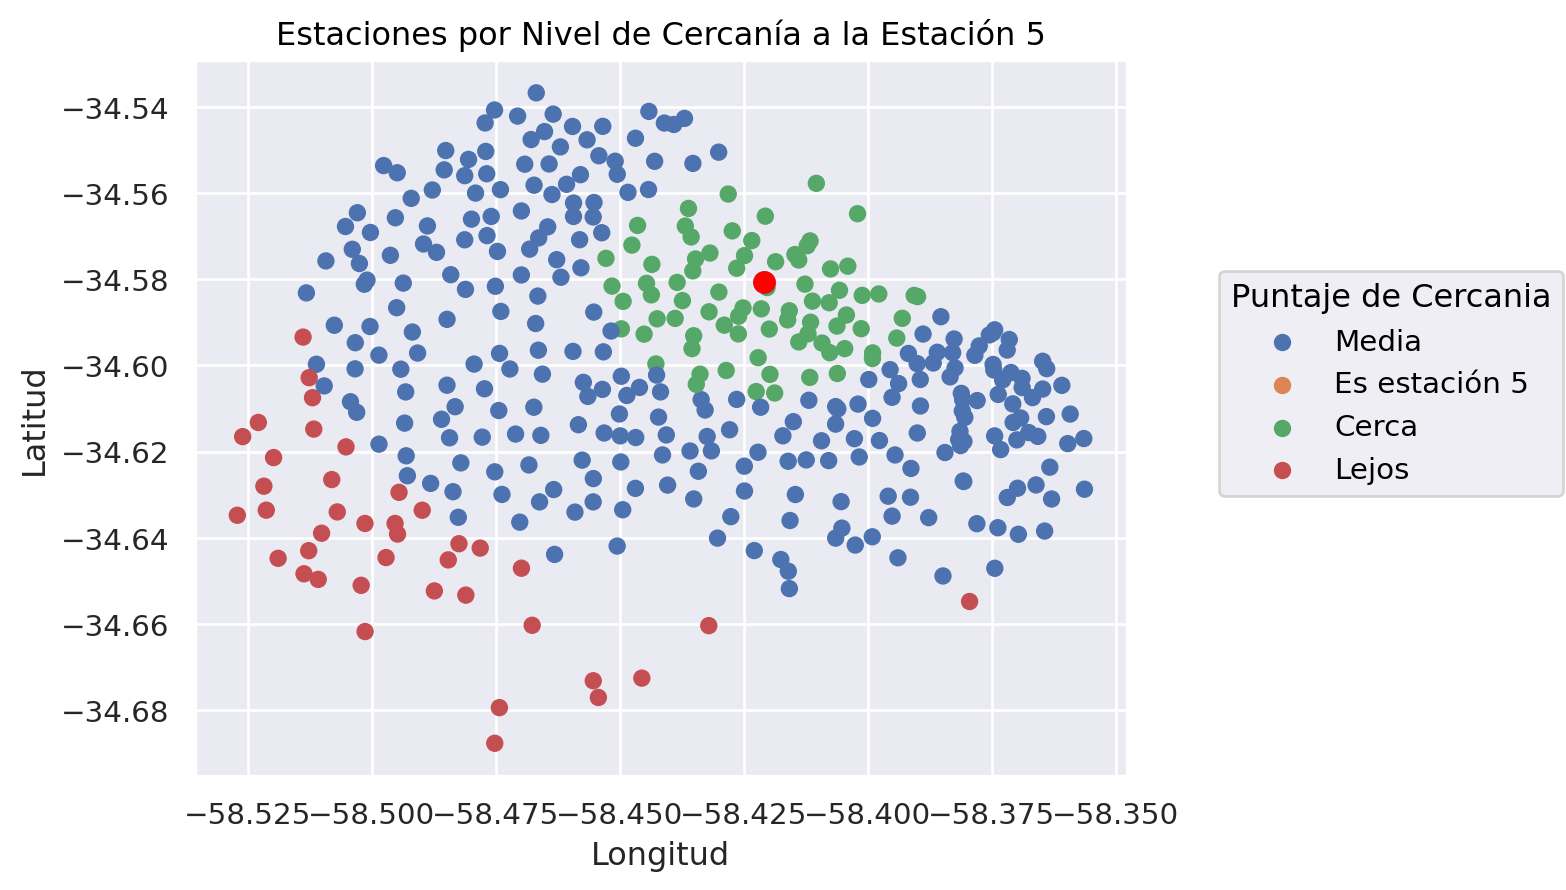

In [49]:
(
    so.Plot(
        data=df_informacion,
        x="lon",
        y="lat"
    )
    .add(so.Dot(), color="etiqueta_cercania")
    .add(
        so.Dot(pointsize=8),
        data=df_informacion[df_informacion["es_estacion_5"] == True],
    )
    .add(
        so.Dot(color="red", pointsize=8),
        data=df_informacion[df_informacion["es_estacion_5"] == True],
    )
    .label(
        x="Longitud",
        y="Latitud",
        title="Estaciones por Nivel de Cercanía a la Estación 5",
        color="Puntaje de Cercania"
    )
    .theme({**so.Plot.config.theme, "axes.grid": True})
)

Ahora se hace una agregación similar a la anterior, pero con los viajes diarios.

In [50]:
conexion.executescript("""
DROP VIEW IF EXISTS viajes_diarios_compuestos;
CREATE VIEW viajes_diarios_compuestos AS
SELECT
    vd.*,
    c.temporada,
    c.tavg AS temp_media,
    c.prcp AS precipitaciones,
    (
        CASE WHEN c.tavg < rct.t_min THEN "Mucho Frio"
             WHEN c.tavg > rct.t_max THEN "Mucho Calor"
             ELSE "Normal"
        END
    ) AS valoracion_temp,
    (
        CASE WHEN c.prcp = 0 THEN "Sin Lluvia"
             ELSE "Con Lluvia"
        END
    ) AS valoracion_prec
FROM viajes_diarios vd
INNER JOIN clima c ON c.fecha = vd.fecha
INNER JOIN rangos_clima_temporadas rct
    ON rct.temporada = c.temporada
    AND rct.año = STRFTIME("%Y", vd.fecha)
GROUP BY vd.fecha;
""")

df_viajes_diarios_compuestos = pd.read_sql_query("""
SELECT * FROM viajes_diarios_compuestos;
""", conexion)
df_viajes_diarios_compuestos["fecha"] = pd.to_datetime(df_viajes_diarios_compuestos["fecha"]).dt.date

df_viajes_diarios_compuestos.head()

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_575,destino_576,destino_577,estacion_anio,dia_semana,temporada,temp_media,precipitaciones,valoracion_temp,valoracion_prec
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,Verano,Lunes,Verano,24.3,0.0,Normal,Sin Lluvia
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,Verano,Martes,Verano,23.7,4.1,Normal,Con Lluvia
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,Verano,Miércoles,Verano,24.1,1.4,Normal,Con Lluvia
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,Verano,Jueves,Verano,24.6,0.0,Normal,Sin Lluvia
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,Verano,Viernes,Verano,25.4,0.0,Mucho Calor,Sin Lluvia


Por otro lado, se pueden obtener cuáles son las estaciones más cercanas a la estación 5, ordenadas por puntaje de cercanía.

In [51]:
estaciones_mas_cercanas = df_informacion[df_informacion["station_id"] != "5"].nlargest(6, "puntaje_cercania_est5")
estaciones_mas_cercanas = estaciones_mas_cercanas[estaciones_mas_cercanas["station_id"].isin([
    column[len("origen_"):] for column in viajes_por_dia.columns if column.startswith("origen")
])]
estaciones_mas_cercanas = estaciones_mas_cercanas[[
    "station_id", "lat", "lon", "distancia_a_est5_km", "puntaje_cercania_est5"
]]

estaciones_mas_cercanas

,station_id,lat,lon,distancia_a_est5_km,puntaje_cercania_est5
377,576,-34.581920,-58.420280,0.164397,98.726885
144,222,-34.575919,-58.418543,0.560248,95.661367
10,14,-34.577424,-58.426387,0.606785,95.300978
324,517,-34.574501,-58.424814,0.759787,94.116116
80,124,-34.581114,-58.412625,0.765133,94.074717


A partir de todos estos datos se pueden confeccionar algunos modelos para la estimación de viajes.

## Modelo 1: Lineal Multivariado

In [52]:
nombres_estaciones_mas_cercanas = [f"destino_{estacion}" for estacion in estaciones_mas_cercanas["station_id"]]
y_lineal, X_lineal = (
    Formula(f"origen_5 ~ {" + ".join(nombres_estaciones_mas_cercanas)}")
    .get_model_matrix(viajes_por_dia)
)

display(X_lineal.head())
display(y_lineal.head())

,Intercept,destino_576,destino_222,destino_14,destino_517,destino_124
0,1.0,0,10,56,46,19
1,1.0,0,15,89,68,30
2,1.0,0,30,101,91,34
3,1.0,0,41,136,80,43
4,1.0,0,19,101,50,31


,origen_5
0,45
1,123
2,144
3,98
4,84


In [53]:
X_train_lineal, X_test_lineal, y_train_lineal, y_test_lineal = train_test_split(X_lineal, y_lineal, test_size=0.2, random_state=2)

modelo_lineal = linear_model.LinearRegression()
modelo_lineal.fit(X_train_lineal, y_train_lineal)

y_pred_lineal = modelo_lineal.predict(X_test_lineal)

# Cálculo del R^2
r2 = r2_score(y_test_lineal, y_pred_lineal)
print("R^2 =", r2)

# Cálculo del ECM
ecm = mean_squared_error(y_test_lineal, y_pred_lineal)
print("Raíz del ECM =", np.sqrt(ecm))

# Cálculo de la Media
media_origen_5 = viajes_por_dia["origen_5"].mean()
print("Media de Viajes con Origen en Plaza Italia =", media_origen_5)

# Cálculo del Error Relativo
error_relativo = 100 * np.sqrt(ecm) / media_origen_5
print("Error Relativo =", error_relativo)

R^2 = 0.5664767694940082
Raíz del ECM = 23.012733738685544
Media de Viajes con Origen en Plaza Italia = 94.39071038251366
Error Relativo = 24.38029510046866


## Modelo 2: Polinómico de Grado 3

In [54]:
y_poly3, X_poly3 = (
    Formula(f"origen_5 ~ {" + ".join([f"poly({nombre}, 3, raw=True)" for nombre in nombres_estaciones_mas_cercanas])}")
    .get_model_matrix(viajes_por_dia)
)

X_train_poly3, X_test_poly3, y_train_poly3, y_test_poly3 = train_test_split(X_poly3, y_poly3, test_size=0.2, random_state=2)

modelo_poly3 = linear_model.LinearRegression()
modelo_poly3.fit(X_train_poly3, y_train_poly3)

y_pred_poly3 = modelo_poly3.predict(X_test_poly3)

# Cálculo del R^2
r2_poly3 = r2_score(y_test_poly3, y_pred_poly3)
print("R^2 =", r2_poly3)

# Cálculo del ECM
ecm_poly3 = mean_squared_error(y_test_poly3, y_pred_poly3)
print("Raíz del ECM =", np.sqrt(ecm_poly3))

# Cálculo del Error Relativo
error_relativo_poly3 = 100 * np.sqrt(ecm_poly3) / media_origen_5
print("Error Relativo =", error_relativo_poly3)

R^2 = 0.5584826615894214
Raíz del ECM = 23.223940331472576
Error Relativo = 24.604052917240175


Se puede ver que ambos modelos rinden igual, por lo tanto nos quedamos con el más simple: el lineal. Sin embargo, habría que repensar las variables predictoras a elegir y sus posibles interacciones. Para esto se plantea usar la matriz de correlación.

In [55]:
matriz_correlacion = viajes_por_dia.corr(numeric_only=True)
correlaciones_con_estacion_5 = matriz_correlacion["origen_5"].sort_values(ascending=False)

correlaciones_con_estacion_5.head(10)

origen_5       1.000000
destino_5      0.975403
destino_29     0.795681
origen_29      0.787160
origen_9       0.779723
destino_14     0.778459
destino_9      0.776930
destino_277    0.770779
origen_14      0.770166
origen_277     0.764003
Name: origen_5, dtype: float64

In [56]:
def obtener_id_estacion(estacion):
    if estacion.startswith("origen"):
        return estacion[len("origen_"):]
    else:
        return estacion[len("destino_"):]

mas_correlacionadas = (
    correlaciones_con_estacion_5
        .reset_index()
        .rename(columns={
            "index": "estacion",
            "origen_5": "correlacion"
        })
)

mas_correlacionadas["estacion"] = mas_correlacionadas["estacion"].map(obtener_id_estacion)
mas_correlacionadas = mas_correlacionadas[mas_correlacionadas["estacion"] != "5"]
mas_correlacionadas = mas_correlacionadas.drop_duplicates(subset=["estacion"]).nlargest(5, "correlacion")

mas_correlacionadas

,estacion,correlacion
2,29,0.795681
4,9,0.779723
5,14,0.778459
7,277,0.770779
10,289,0.762231


In [57]:
df_informacion[df_informacion["station_id"].isin(mas_correlacionadas["estacion"])][[
    "station_id", "distancia_a_est5_km", "etiqueta_cercania"
]]

,station_id,distancia_a_est5_km,etiqueta_cercania
7,9,1.326374,Cerca
10,14,0.606785,Cerca
18,29,3.256970,Media
183,277,2.346198,Cerca
188,289,3.405654,Media


Se puede ver que las estaciones más correlacionadas son también estaciones cercanas a la estación 5.

## Modelo 3:

Se plantean como variables predictoras las siguientes:
- Mediana y media de origen de estaciones etiquetadas como cercanas
- Mediana y media de destino de estaciones etiquetadas como cercanas
- Mediana y media de destino de estaciones etiquetadas como medias
- Día de la semana
- Valoración de la temperatura
- Valoración de las precipitaciones

Ahora se va a hacer un análisis de la dispersión semanal de los viajes.

[]

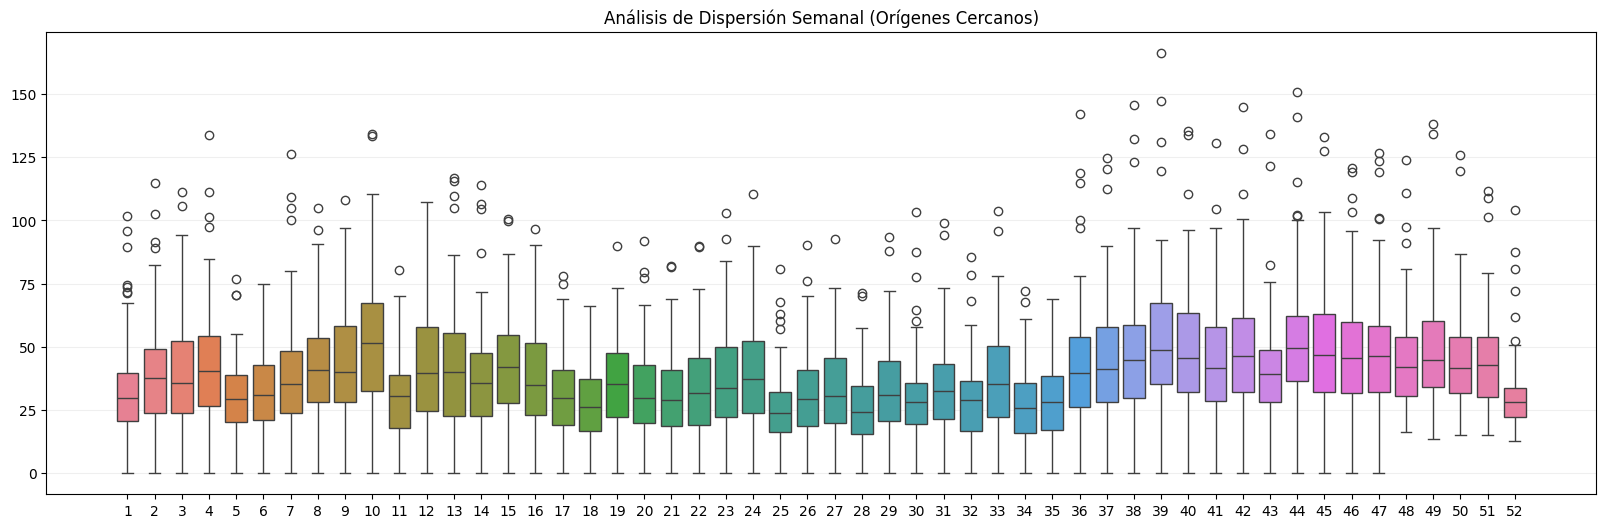

In [58]:
estaciones_cercanas = df_informacion[df_informacion["etiqueta_cercania"] == "Cerca"]["station_id"].astype(str).tolist()
estaciones_medias = df_informacion[df_informacion["etiqueta_cercania"] == "Media"]["station_id"].astype(str).tolist()

origenes_cercanos = [f"origen_{id}" for id in estaciones_cercanas if f"origen_{id}" in df_viajes_diarios_compuestos.columns]
destinos_cercanos = [f"destino_{id}" for id in estaciones_cercanas if f"destino_{id}" in df_viajes_diarios_compuestos.columns]
destinos_a_media_distancia = [f"destino_{id}" for id in estaciones_medias if f"destino_{id}" in df_viajes_diarios_compuestos.columns]

df_dispersion = df_viajes_diarios_compuestos[["fecha", *origenes_cercanos]]

df_dispersion["semana"] = pd.to_datetime(df_dispersion["fecha"]).dt.isocalendar().week
df_dispersion["año"]    = pd.to_datetime(df_dispersion["fecha"]).dt.isocalendar().year

df_dispersion = df_dispersion.groupby(["semana", "año"]).mean(numeric_only=True).T

fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=df_dispersion, ax=ax)
ax.set_title("Análisis de Dispersión Semanal (Orígenes Cercanos)", fontsize=12)
ax.set_ylabel("Viajes" if i % 3 == 0 else "")
ax.grid(axis="y", alpha=0.2)

plt.plot()

In [59]:
df_modelo = df_viajes_diarios_compuestos[["origen_5", "destino_5", "fecha", "dia_semana", "estacion_anio", "valoracion_temp", "valoracion_prec"]]

df_modelo["media_origenes_cercanos"]   = df_viajes_diarios_compuestos[origenes_cercanos].mean(axis=1).round(2)
df_modelo["mediana_origenes_cercanos"] = df_viajes_diarios_compuestos[origenes_cercanos].median(axis=1)
df_modelo["media_destinos_cercanos"]   = df_viajes_diarios_compuestos[destinos_cercanos].mean(axis=1).round(2)
df_modelo["mediana_destinos_cercanos"] = df_viajes_diarios_compuestos[destinos_cercanos].median(axis=1)
df_modelo["media_destinos_medios"]     = df_viajes_diarios_compuestos[destinos_a_media_distancia].mean(axis=1).round(2)
df_modelo["mediana_destinos_medios"]   = df_viajes_diarios_compuestos[destinos_a_media_distancia].median(axis=1)

df_modelo = df_modelo[[
    "origen_5",
    "destino_5",
    "fecha", 
    "dia_semana", 
    "estacion_anio",
    "valoracion_temp", 
    "valoracion_prec", 
    "media_origenes_cercanos", 
    "mediana_origenes_cercanos", 
    "media_destinos_cercanos", 
    "mediana_destinos_cercanos", 
    "media_destinos_medios", 
    "mediana_destinos_medios"
]]

df_modelo

,origen_5,destino_5,fecha,dia_semana,estacion_anio,valoracion_temp,valoracion_prec,media_origenes_cercanos,mediana_origenes_cercanos,media_destinos_cercanos,mediana_destinos_cercanos,media_destinos_medios,mediana_destinos_medios
0,45,53,2024-01-01,Lunes,Verano,Normal,Sin Lluvia,23.10,18.0,22.81,16.5,10.18,8.0
1,123,122,2024-01-02,Martes,Verano,Normal,Con Lluvia,37.41,34.0,38.08,35.5,24.16,20.5
2,144,123,2024-01-03,Miércoles,Verano,Normal,Con Lluvia,44.12,41.5,44.31,42.5,26.08,23.0
3,98,94,2024-01-04,Jueves,Verano,Normal,Sin Lluvia,44.38,42.5,44.65,43.5,25.55,22.0
4,84,85,2024-01-05,Viernes,Verano,Mucho Calor,Sin Lluvia,40.97,38.0,41.03,37.0,24.44,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,103,101,2024-12-27,Viernes,Verano,Mucho Frio,Sin Lluvia,43.05,38.0,42.12,38.5,31.68,28.0
362,33,40,2024-12-28,Sábado,Verano,Mucho Frio,Sin Lluvia,24.85,20.5,24.87,19.0,12.44,10.0
363,83,93,2024-12-29,Domingo,Verano,Mucho Frio,Sin Lluvia,26.72,20.0,26.41,19.5,12.96,10.0
364,123,117,2024-12-30,Lunes,Verano,Normal,Sin Lluvia,41.36,39.0,40.71,37.0,27.45,23.0


### Probando el Modelo con las Medias

In [60]:
y_medias_lineal, X_medias_lineal = (
    Formula("""
        origen_5 ~ media_origenes_cercanos +
                   media_destinos_cercanos +
                   media_destinos_medios +
                   valoracion_temp +
                   valoracion_prec +
                   dia_semana
    """).get_model_matrix(df_modelo)
)

X_train_medias_lineal, X_test_medias_lineal, y_train_medias_lineal, y_test_medias_lineal = train_test_split(X_medias_lineal, y_medias_lineal, test_size=0.2, random_state=2)

modelo_medias_lineal = linear_model.LinearRegression()
modelo_medias_lineal.fit(X_train_medias_lineal, y_train_medias_lineal)

y_pred_medias_lineal = modelo_medias_lineal.predict(X_test_medias_lineal)

media_origen_5 = df_modelo["origen_5"].mean()

# Cálculo del R^2
r2 = r2_score(y_test_medias_lineal, y_pred_medias_lineal)
print("R^2 =", r2)

# Cálculo del ECM
ecm = mean_squared_error(y_test_medias_lineal, y_pred_medias_lineal)
print("Raíz del ECM =", np.sqrt(ecm))

# Cálculo del Error Relativo
error_relativo = 100 * np.sqrt(ecm) / media_origen_5
print("Error Relativo =", error_relativo)

R^2 = 0.773277220445349
Raíz del ECM = 16.642156592065803
Error Relativo = 17.631138196358826


In [61]:
finde = ["Sábado", "Domingo"]
df_modelo["es_finde"] = df_modelo["dia_semana"].isin(finde).astype(int)

df_modelo.head()

,origen_5,destino_5,fecha,dia_semana,estacion_anio,valoracion_temp,valoracion_prec,media_origenes_cercanos,mediana_origenes_cercanos,media_destinos_cercanos,mediana_destinos_cercanos,media_destinos_medios,mediana_destinos_medios,es_finde
0,45,53,2024-01-01,Lunes,Verano,Normal,Sin Lluvia,23.10,18.0,22.81,16.5,10.18,8.0,0
1,123,122,2024-01-02,Martes,Verano,Normal,Con Lluvia,37.41,34.0,38.08,35.5,24.16,20.5,0
2,144,123,2024-01-03,Miércoles,Verano,Normal,Con Lluvia,44.12,41.5,44.31,42.5,26.08,23.0,0
3,98,94,2024-01-04,Jueves,Verano,Normal,Sin Lluvia,44.38,42.5,44.65,43.5,25.55,22.0,0
4,84,85,2024-01-05,Viernes,Verano,Mucho Calor,Sin Lluvia,40.97,38.0,41.03,37.0,24.44,22.0,0


In [62]:
y_medias_poly3, X_medias_poly3 = (
    Formula("""
        origen_5 ~ poly(media_origenes_cercanos, 3, raw=True) + 
                   poly(media_destinos_cercanos, 3, raw=True) +
                   poly(media_destinos_medios, 3, raw=True) +
                   valoracion_temp +
                   valoracion_prec +
                   dia_semana
    """).get_model_matrix(df_modelo)
)

X_train_medias_poly3, X_test_medias_poly3, y_train_medias_poly3, y_test_medias_poly3 = train_test_split(X_medias_poly3, y_medias_poly3, test_size=0.2, random_state=2)

modelo_medias_poly3 = linear_model.LinearRegression()
modelo_medias_poly3.fit(X_train_medias_poly3, y_train_medias_poly3)

y_pred_medias_poly3 = modelo_medias_poly3.predict(X_test_medias_poly3)

r2 = r2_score(y_test_medias_poly3, y_pred_medias_poly3)
raiz_ecm = np.sqrt(mean_squared_error(y_test_medias_poly3, y_pred_medias_poly3))

media_origen_5 = df_modelo["origen_5"].mean()
error_relativo = (raiz_ecm / media_origen_5) * 100

print(f"R^2 Polinómico (Test): {r2}")
print(f"Raiz cuadrada del ECM: {raiz_ecm}")
print(f"Error relativo: {error_relativo:.2f}%")

R^2 Polinómico (Test): 0.7419081977914801
Raiz cuadrada del ECM: 17.756163304867115
Error relativo: 18.81%


Acá se puede ver que el R² disminuye al usar un ajuste polinomial. Por lo tanto, para el último modelo se va a usar uno lineal, al cual se le modifican las variables predictoras.

In [63]:
y_medias_lineal_reducido, X_medias_lineal_reducido = (
    Formula("""
        origen_5 ~ destino_5 +
                   media_destinos_cercanos +
                   valoracion_temp
    """).get_model_matrix(df_modelo)
)

(
    X_train_medias_lineal_reducido, X_test_medias_lineal_reducido,
    y_train__medias_lineal_reducido, y_test_medias_lineal_reducido
) = train_test_split(X_medias_lineal_reducido, y_medias_lineal_reducido, test_size=0.2, random_state=2)

modelo_medias_lineal_reducido = linear_model.LinearRegression()
modelo_medias_lineal_reducido.fit(X_train_medias_lineal_reducido, y_train__medias_lineal_reducido)

y_pred_medias_lineal_reducido = modelo_medias_lineal_reducido.predict(X_test_medias_lineal_reducido)

r2 = r2_score(y_test_medias_lineal_reducido, y_pred_medias_lineal_reducido)
raiz_ecm = np.sqrt(mean_squared_error(y_test_medias_lineal_reducido, y_pred_medias_lineal_reducido))

media_origen_5 = df_modelo["origen_5"].mean()
error_relativo = (raiz_ecm / media_origen_5) * 100

print(f"R^2 Polinómico (Test): {r2}")
print(f"Raiz cuadrada del ECM: {raiz_ecm}")
print(f"Error relativo: {error_relativo:.2f}%")

R^2 Polinómico (Test): 0.9320746493808549
Raiz cuadrada del ECM: 9.109152438910396
Error relativo: 9.65%


In [64]:
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    
    return {
        "R^2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

pd.DataFrame({
    "Modelo Lineal":                 evaluar_modelo(modelo_lineal, X_test_lineal, y_test_lineal),
    "Modelo Lineal Medias":          evaluar_modelo(modelo_medias_lineal, X_test_medias_lineal, y_test_medias_lineal),
    "Modelo Lineal Medias Reducido": evaluar_modelo(modelo_medias_lineal_reducido, X_test_medias_lineal_reducido, y_test_medias_lineal_reducido),
}).T.sort_values("R^2", ascending=False)

,R^2,RMSE,MAE
Modelo Lineal Medias Reducido,0.932075,9.109152,6.764662
Modelo Lineal Medias,0.773277,16.642157,13.302746
Modelo Lineal,0.566477,23.012734,17.116780


Por lo tanto, de los modelos lineales propuestos, el mejor es el `Modelo Lineal Medias Reducido` el cual presenta el mayor R^2. Además, es el que menos variables requiere para obtener un error reducido. Y también tiene sentido que introducir la variable `destino_5` aumente significativamente el R^2 y reduzca el error relativo, ya que para que alguien tome una bicicleta en Plaza Italia, otra persona tuvo que finalizar su viaje ahí, es decir, tiene que haber algún viaje cuyo destino haya sido Plaza Italia.

In [65]:
def formatear_formula(modelo, y):
    resultado = []
    for (coeficiente, variable) in zip(*modelo.coef_, modelo.feature_names_in_):
        if np.abs(coeficiente) == 0:
            continue

        signo = "+ " if coeficiente > 0 else "- "
        if coeficiente > 0 and len(resultado) == 0:
            signo = ""
        
        resultado.append(f"{signo}{np.abs(coeficiente):.3f} * {variable}")

    return f"{y} = " + " ".join(resultado)

formula_final = formatear_formula(modelo_medias_lineal_reducido, "origen_5")

print(f"Fórmula Final: {formula_final}")

Fórmula Final: origen_5 = 0.946 * destino_5 + 0.159 * media_destinos_cercanos - 2.253 * valoracion_temp[T.Mucho Frio] + 0.110 * valoracion_temp[T.Normal]
